In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.listdir('data')

['COVID19_open_line_list.csv',
 '.DS_Store',
 'covid_19_data.csv',
 'covid19_xmlToCSV.csv',
 'covid19_date_stats_n.csv',
 'COVID19_open_line_list_file_cleaned.csv',
 'web_data_covid19.csv',
 'Cleaned_Tweet_data.csv',
 'twitter_data_1.txt']

In [3]:
#Load the csv file
dfol=pd.read_csv('data/COVID19_open_line_list.csv')
dfd=pd.read_csv('data/covid_19_data.csv')


In [4]:
# data information
dfol.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13173 non-null  float64
 1   age                       1349 non-null   object 
 2   sex                       1264 non-null   object 
 3   city                      10194 non-null  object 
 4   province                  12906 non-null  object 
 5   country                   13148 non-null  object 
 6   wuhan(0)_not_wuhan(1)     13170 non-null  float64
 7   latitude                  13147 non-null  float64
 8   longitude                 13147 non-null  float64
 9   geo_resolution            13147 non-null  object 
 10  date_onset_symptoms       746 non-null    object 
 11  date_admission_hospital   730 non-null    object 
 12  date_confirmation         13089 non-null  object 
 13  symptoms                  493 non-null    object 
 14  lives_

In [6]:
dfd.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14171 entries, 0 to 14170
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              14171 non-null  int64  
 1   ObservationDate  14171 non-null  object 
 2   Province/State   7247 non-null   object 
 3   Country/Region   14171 non-null  object 
 4   Last Update      14171 non-null  object 
 5   Confirmed        14171 non-null  float64
 6   Deaths           14171 non-null  float64
 7   Recovered        14171 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 885.8+ KB


### Clean the COVID19_open_line_list

In [8]:
dfol.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
dfol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14126 entries, 0 to 14125
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        13173 non-null  float64
 1   age                       1349 non-null   object 
 2   sex                       1264 non-null   object 
 3   city                      10194 non-null  object 
 4   province                  12906 non-null  object 
 5   country                   13148 non-null  object 
 6   wuhan(0)_not_wuhan(1)     13170 non-null  float64
 7   latitude                  13147 non-null  float64
 8   longitude                 13147 non-null  float64
 9   geo_resolution            13147 non-null  object 
 10  date_onset_symptoms       746 non-null    object 
 11  date_admission_hospital   730 non-null    object 
 12  date_confirmation         13089 non-null  object 
 13  symptoms                  493 non-null    object 
 14  lives_

In [10]:
dfol.describe()

,ID,wuhan(0)_not_wuhan(1),latitude,longitude,chronic_disease_binary,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
count,13173.000000,13170.0,13147.000000,13147.000000,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,6769.250436,1.0,31.994650,110.495353,0.722222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3920.886020,0.0,7.536335,27.985144,0.460889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.0,-37.813600,-124.953070,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3351.000000,1.0,27.905380,111.729600,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6865.000000,1.0,31.759410,115.441800,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10180.000000,1.0,35.781340,120.440400,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,13479.000000,1.0,69.649468,153.400000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
## data shape and data types
print(dfol.shape)
print(dfol.dtypes)


(14126, 45)
ID                          float64
age                          object
sex                          object
city                         object
province                     object
country                      object
wuhan(0)_not_wuhan(1)       float64
latitude                    float64
longitude                   float64
geo_resolution               object
date_onset_symptoms          object
date_admission_hospital      object
date_confirmation            object
symptoms                     object
lives_in_Wuhan               object
travel_history_dates         object
travel_history_location      object
reported_market_exposure     object
additional_information       object
chronic_disease_binary      float64
chronic_disease              object
source                       object
sequence_available           object
outcome                      object
date_death_or_discharge      object
notes_for_discussion         object
location                     object
admin3          

In [12]:
## Select numeric columns
dfol_numeric=dfol.select_dtypes(include=[np.number])
numeric_cols=dfol_numeric.columns.values
print(numeric_cols)

['ID' 'wuhan(0)_not_wuhan(1)' 'latitude' 'longitude'
 'chronic_disease_binary' 'Unnamed: 33' 'Unnamed: 34' 'Unnamed: 35'
 'Unnamed: 36' 'Unnamed: 37' 'Unnamed: 38' 'Unnamed: 39' 'Unnamed: 40'
 'Unnamed: 41' 'Unnamed: 42' 'Unnamed: 43' 'Unnamed: 44']


In [13]:
## Select non-numeric columns
dfol_non_numeric=dfol.select_dtypes(exclude=[np.number])
non_numeric_cols=dfol_non_numeric.columns.values
print(non_numeric_cols)

['age' 'sex' 'city' 'province' 'country' 'geo_resolution'
 'date_onset_symptoms' 'date_admission_hospital' 'date_confirmation'
 'symptoms' 'lives_in_Wuhan' 'travel_history_dates'
 'travel_history_location' 'reported_market_exposure'
 'additional_information' 'chronic_disease' 'source' 'sequence_available'
 'outcome' 'date_death_or_discharge' 'notes_for_discussion' 'location'
 'admin3' 'admin2' 'admin1' 'country_new' 'admin_id'
 'data_moderator_initials']


## Missing data

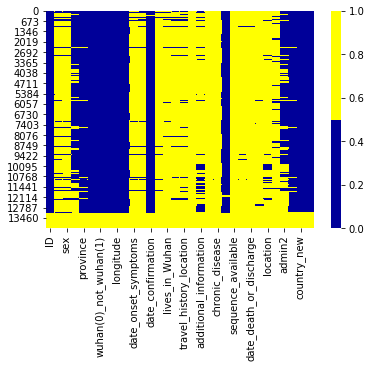

In [14]:
## Technique 1 Heat Map
cols=dfol.columns[:32] ## first 32 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dfol[cols].isnull(),cmap=sns.color_palette(colours))
plt.show()

## Technique 2: Missing Data Percentage List

In [15]:
for col in dfol.columns:
    pct_missinng=np.mean(dfol[col].isnull())
    print('{} {}%'.format(col,round(pct_missinng*100)))

ID 7.0%
age 90.0%
sex 91.0%
city 28.0%
province 9.0%
country 7.0%
wuhan(0)_not_wuhan(1) 7.0%
latitude 7.0%
longitude 7.0%
geo_resolution 7.0%
date_onset_symptoms 95.0%
date_admission_hospital 95.0%
date_confirmation 7.0%
symptoms 97.0%
lives_in_Wuhan 96.0%
travel_history_dates 96.0%
travel_history_location 95.0%
reported_market_exposure 100.0%
additional_information 83.0%
chronic_disease_binary 100.0%
chronic_disease 100.0%
source 8.0%
sequence_available 100.0%
outcome 99.0%
date_death_or_discharge 99.0%
notes_for_discussion 99.0%
location 93.0%
admin3 92.0%
admin2 36.0%
admin1 9.0%
country_new 7.0%
admin_id 7.0%
data_moderator_initials 100.0%
Unnamed: 33 100.0%
Unnamed: 34 100.0%
Unnamed: 35 100.0%
Unnamed: 36 100.0%
Unnamed: 37 100.0%
Unnamed: 38 100.0%
Unnamed: 39 100.0%
Unnamed: 40 100.0%
Unnamed: 41 100.0%
Unnamed: 42 100.0%
Unnamed: 43 100.0%
Unnamed: 44 100.0%


## Missing data histogram

In [16]:
dfol2=dfol.copy()

created a missing indicator ID
created a missing indicator age
created a missing indicator sex
created a missing indicator city
created a missing indicator province
created a missing indicator country
created a missing indicator wuhan(0)_not_wuhan(1)
created a missing indicator latitude
created a missing indicator longitude
created a missing indicator geo_resolution
created a missing indicator date_onset_symptoms
created a missing indicator date_admission_hospital
created a missing indicator date_confirmation
created a missing indicator symptoms
created a missing indicator lives_in_Wuhan
created a missing indicator travel_history_dates
created a missing indicator travel_history_location
created a missing indicator reported_market_exposure
created a missing indicator additional_information
created a missing indicator chronic_disease_binary
created a missing indicator chronic_disease
created a missing indicator source
created a missing indicator sequence_available
created a missing indic

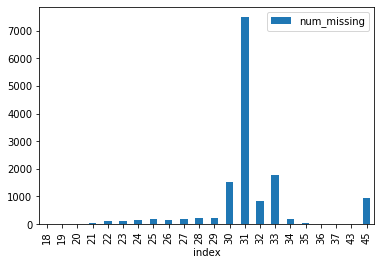

In [17]:
# first create missign indicator for features with missing data
for col in dfol2.columns:
    missing=dfol2[col].isnull()
    num_missing=np.sum(missing)
    if num_missing>0:
        print('created a missing indicator {}'.format(col))
        dfol2['{}_is_missing'.format(col)]=missing
        
#then plot the histogram based on the indicator
ismissing_col=[col for col in dfol2.columns if '_is_missing'  in col]
dfol2['num_missing']=dfol2[ismissing_col].sum(axis=1)
dfol2['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index',y='num_missing')


# Solution

##  1 Drop the Observation

In [18]:
# drop the rows with lots of missing values (35 missing values in a row)
ind_missing=dfol2[dfol2['num_missing']>35].index
dfol2 = dfol2.drop(ind_missing, axis=0)

## Solution #2: Drop the Feature

In [19]:
# drop the features which has 80  more percent is null
dfol2_less_features=dfol2.copy()
missing_col=[]

In [20]:
for col in dfol2.columns:
    num_missing=np.mean(dfol2[col].isnull())
    percentage=round(num_missing*100)
    if percentage > 80.0:
        missing_col.append(col)

In [21]:
missing_col

['age',
 'sex',
 'date_onset_symptoms',
 'date_admission_hospital',
 'symptoms',
 'lives_in_Wuhan',
 'travel_history_dates',
 'travel_history_location',
 'reported_market_exposure',
 'additional_information',
 'chronic_disease_binary',
 'chronic_disease',
 'sequence_available',
 'outcome',
 'date_death_or_discharge',
 'notes_for_discussion',
 'location',
 'admin3',
 'data_moderator_initials',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Unnamed: 38',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44']

In [22]:
dfol2.drop(missing_col,axis=1,inplace=True)

In [23]:
dfol2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13164 entries, 0 to 13173
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   13164 non-null  float64
 1   city                                 10194 non-null  object 
 2   province                             12904 non-null  object 
 3   country                              13139 non-null  object 
 4   wuhan(0)_not_wuhan(1)                13161 non-null  float64
 5   latitude                             13140 non-null  float64
 6   longitude                            13140 non-null  float64
 7   geo_resolution                       13140 non-null  object 
 8   date_confirmation                    13087 non-null  object 
 9   source                               12947 non-null  object 
 10  admin2                               9068 non-null   object 
 11  admin1                      

In [24]:
dfol2_less_features.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 36_is_missing,Unnamed: 37_is_missing,Unnamed: 38_is_missing,Unnamed: 39_is_missing,Unnamed: 40_is_missing,Unnamed: 41_is_missing,Unnamed: 42_is_missing,Unnamed: 43_is_missing,Unnamed: 44_is_missing,num_missing
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,True,True,True,True,True,True,True,True,True,23
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,True,True,True,True,True,True,True,True,True,23
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,True,True,True,True,True,True,True,True,True,22
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,True,True,True,True,True,True,True,True,True,23
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,True,True,True,True,True,True,True,True,True,22


In [25]:
# remove is_missing_col
missing_cols=[]

In [26]:
for col in dfol2.columns:
    if '_is_missing' in col:
        missing_cols.append(col)

In [27]:
missing_cols

['ID_is_missing',
 'age_is_missing',
 'sex_is_missing',
 'city_is_missing',
 'province_is_missing',
 'country_is_missing',
 'wuhan(0)_not_wuhan(1)_is_missing',
 'latitude_is_missing',
 'longitude_is_missing',
 'geo_resolution_is_missing',
 'date_onset_symptoms_is_missing',
 'date_admission_hospital_is_missing',
 'date_confirmation_is_missing',
 'symptoms_is_missing',
 'lives_in_Wuhan_is_missing',
 'travel_history_dates_is_missing',
 'travel_history_location_is_missing',
 'reported_market_exposure_is_missing',
 'additional_information_is_missing',
 'chronic_disease_binary_is_missing',
 'chronic_disease_is_missing',
 'source_is_missing',
 'sequence_available_is_missing',
 'outcome_is_missing',
 'date_death_or_discharge_is_missing',
 'notes_for_discussion_is_missing',
 'location_is_missing',
 'admin3_is_missing',
 'admin2_is_missing',
 'admin1_is_missing',
 'country_new_is_missing',
 'admin_id_is_missing',
 'data_moderator_initials_is_missing',
 'Unnamed: 33_is_missing',
 'Unnamed: 34_is_

In [28]:
dfol2.drop(missing_cols,axis=1,inplace=True)

In [29]:
dfol2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13164 entries, 0 to 13173
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     13164 non-null  float64
 1   city                   10194 non-null  object 
 2   province               12904 non-null  object 
 3   country                13139 non-null  object 
 4   wuhan(0)_not_wuhan(1)  13161 non-null  float64
 5   latitude               13140 non-null  float64
 6   longitude              13140 non-null  float64
 7   geo_resolution         13140 non-null  object 
 8   date_confirmation      13087 non-null  object 
 9   source                 12947 non-null  object 
 10  admin2                 9068 non-null   object 
 11  admin1                 12877 non-null  object 
 12  country_new            13072 non-null  object 
 13  admin_id               13096 non-null  object 
 14  num_missing            13164 non-null  int64  
dtypes:

In [30]:
dfol2.head()

,ID,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_confirmation,source,admin2,admin1,country_new,admin_id,num_missing
0,1.0,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,22.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,Hefei City,Anhui,China,340181,23
1,2.0,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,23.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,Hefei City,Anhui,China,340111,23
2,3.0,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,23.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,Hefei City,Anhui,China,340104,22
3,4.0,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,23.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,Hefei City,Anhui,China,340104,23
4,5.0,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,23.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,Hefei City,Anhui,China,340122,22


## Clean the covid_19_data.csv

In [31]:
dfd.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [32]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14171 entries, 0 to 14170
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              14171 non-null  int64  
 1   ObservationDate  14171 non-null  object 
 2   Province/State   7247 non-null   object 
 3   Country/Region   14171 non-null  object 
 4   Last Update      14171 non-null  object 
 5   Confirmed        14171 non-null  float64
 6   Deaths           14171 non-null  float64
 7   Recovered        14171 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 885.8+ KB


## Missing data

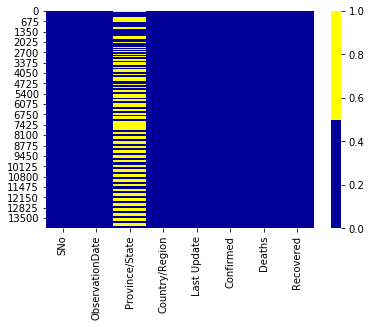

In [33]:
## ## Technique 1 Heat Map
cols=dfd.columns[:32] ## first 32 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dfd[cols].isnull(),cmap=sns.color_palette(colours))
plt.show()

## Technique 2: Missing Data Percentage List


In [34]:
for col in dfd.columns:
    pct_missinng=np.mean(dfd[col].isnull())
    print('{} {}%'.format(col,round(pct_missinng*100)))

SNo 0.0%
ObservationDate 0.0%
Province/State 49.0%
Country/Region 0.0%
Last Update 0.0%
Confirmed 0.0%
Deaths 0.0%
Recovered 0.0%


In [35]:
dfd.drop(columns=['Province/State'],axis=1,inplace=True)

In [36]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14171 entries, 0 to 14170
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              14171 non-null  int64  
 1   ObservationDate  14171 non-null  object 
 2   Country/Region   14171 non-null  object 
 3   Last Update      14171 non-null  object 
 4   Confirmed        14171 non-null  float64
 5   Deaths           14171 non-null  float64
 6   Recovered        14171 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 775.1+ KB


# Store the cleaned data in csv files

## Store the COVID19_open_line_list.

In [37]:
dfol2.head()

,ID,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_confirmation,source,admin2,admin1,country_new,admin_id,num_missing
0,1.0,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,22.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,Hefei City,Anhui,China,340181,23
1,2.0,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,23.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,Hefei City,Anhui,China,340111,23
2,3.0,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,23.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,Hefei City,Anhui,China,340104,22
3,4.0,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,23.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,Hefei City,Anhui,China,340104,23
4,5.0,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,23.01.2020,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,Hefei City,Anhui,China,340122,22


In [38]:
dfol2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13164 entries, 0 to 13173
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     13164 non-null  float64
 1   city                   10194 non-null  object 
 2   province               12904 non-null  object 
 3   country                13139 non-null  object 
 4   wuhan(0)_not_wuhan(1)  13161 non-null  float64
 5   latitude               13140 non-null  float64
 6   longitude              13140 non-null  float64
 7   geo_resolution         13140 non-null  object 
 8   date_confirmation      13087 non-null  object 
 9   source                 12947 non-null  object 
 10  admin2                 9068 non-null   object 
 11  admin1                 12877 non-null  object 
 12  country_new            13072 non-null  object 
 13  admin_id               13096 non-null  object 
 14  num_missing            13164 non-null  int64  
dtypes:

In [39]:
# REMOVE num_missing COLUMN it's of no use now
dfol2.drop(columns=['num_missing'],axis=1,inplace=True)

In [40]:
dfol2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13164 entries, 0 to 13173
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     13164 non-null  float64
 1   city                   10194 non-null  object 
 2   province               12904 non-null  object 
 3   country                13139 non-null  object 
 4   wuhan(0)_not_wuhan(1)  13161 non-null  float64
 5   latitude               13140 non-null  float64
 6   longitude              13140 non-null  float64
 7   geo_resolution         13140 non-null  object 
 8   date_confirmation      13087 non-null  object 
 9   source                 12947 non-null  object 
 10  admin2                 9068 non-null   object 
 11  admin1                 12877 non-null  object 
 12  country_new            13072 non-null  object 
 13  admin_id               13096 non-null  object 
dtypes: float64(4), object(10)
memory usage: 1.5+ MB


In [41]:
## Create a csv file and insert the cleaned data
try:
    filename='save_data/COVID19_open_line_list_file_cleaned.csv';
    dfol2.to_csv(filename,encoding='utf-8',index=False)
except IOError as e:
    print('Error occur during writing of cleaned files:',filename,e)

Error occur during writing of cleaned files: save_data/COVID19_open_line_list_file_cleaned.csv [Errno 2] No such file or directory: 'save_data/COVID19_open_line_list_file_cleaned.csv'


## Store the covid_19_data.¶

In [42]:
dfd.head()

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [43]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14171 entries, 0 to 14170
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              14171 non-null  int64  
 1   ObservationDate  14171 non-null  object 
 2   Country/Region   14171 non-null  object 
 3   Last Update      14171 non-null  object 
 4   Confirmed        14171 non-null  float64
 5   Deaths           14171 non-null  float64
 6   Recovered        14171 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 775.1+ KB


In [45]:
## Create a csv file and insert the cleaned data
try:
    filename='save_data/covid_19_data_cleaned.csv';
    dfd.to_csv(filename,encoding='utf-8',index=False)
except IOError as e:
    print('Error occur during writing of cleaned files:',filename,e)